In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, Bidirectional, Conv1D, GRU
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
dataset = pd.read_csv("data_final.csv")
dataset.dropna(inplace=True)
dataset.head()

,tweet,label
1,RT @colonelkickhead: Another bloody instant re...,none
3,@azzamalirhabi @JihadiA8 This video of the Pes...,none
5,Oh really? No more instant restaurants? THAT'S...,none
7,RT @Benfrancisallen: It hasn't been a good few...,none
9,RT @NoToFeminism: I donâ€™t need femisnsn beca...,none


In [3]:
def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [4]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [5]:
X = []
sentences = list(dataset['tweet'])
for sen in sentences:
    X.append(preprocess_text(sen))
print(X[61])

 DianH So we bombed Hitler and various dictators because they refused to be slaves Muslims need to get grip on reality 


In [6]:
y = dataset['label']

encoder = LabelBinarizer()
y = encoder.fit_transform(y)
print(y[61])

[0 1 0]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
print(X_train)

['RT AsheSchow look at how Clinton accusers would be treated under today sexual assault standards gt http co A aMJ ', 'How can they get away with that Kat amp Andre are cunts MKR', 'Offline for the night Need break ll be back tomorrow ', ' NNdabbour These are all excuses to hide the fact that you are following an evil and inhuman religion ', ' NiceeNhess All of you Islamists repeat the same brain dead lines that someone else told you to say ve seen that one thousand times ', ' n verg stevesalaita Palestinians are half Egyptian and half Saudi Palestinians are the spearhead for the Arabs against the Jews ', ' MKR is so intense this round', ' jcmanous looks neat need to start keeping my eyes open for CFPs ', 'Kat amp Andre need to be slapped with sportsmanship or just not be such bad losers it so off putting MKR', 'Let not forget Kern is the person that said he was fully invested in anti harassment Remember the cape comment made ', ' GidgitVonLaRue You re not wrong Can wait for their come

In [9]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train)

[[8, 2632, 149, 44, 55, 3015, 70, 21, 1464, 336, 244, 841, 2243, 2154, 339, 13, 12, 104], [55, 28, 18, 52, 445, 24, 9, 31, 51, 68, 15, 2149, 3], [7954, 17, 1, 385, 108, 1208, 150, 21, 125, 967], [892, 103, 15, 32, 1797, 2, 941, 1, 285, 9, 7, 15, 753, 58, 656, 4, 1477, 162], [32, 6, 7, 2098, 1327, 1, 145, 926, 483, 2032, 9, 148, 348, 457, 7, 2, 116, 90, 304, 9, 56, 2261, 351], [1648, 4244, 4245, 896, 15, 484, 2074, 4, 484, 506, 896, 15, 1, 17, 1, 1802, 163, 1, 172], [3, 5, 29, 3467, 20, 205], [3980, 197, 5856, 108, 2, 434, 2510, 36, 624, 606, 17], [31, 51, 68, 108, 2, 21, 24, 2482, 54, 25, 14, 21, 277, 169, 3219, 10, 29, 100, 1025, 3], [177, 14, 1197, 4479, 5, 1, 281, 9, 232, 64, 39, 1884, 8452, 11, 361, 312, 640, 1, 2084, 817, 208], [1370, 7, 72, 14, 224, 28, 321, 17, 57, 6706, 3], [3400, 329, 66, 238, 258, 6, 37, 10, 2217, 67], [570, 256, 659, 199, 49, 42, 22, 2277, 41, 275, 5, 3814], [5706, 303, 4, 7, 15, 15, 443, 2651, 11, 772, 17, 32, 89, 7, 3000, 9738, 25, 282], [508, 1, 1556, 95,

In [10]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

In [11]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train)

[[   8 2632  149 ...    0    0    0]
 [  55   28   18 ...    0    0    0]
 [7954   17    1 ...    0    0    0]
 ...
 [4882   79  150 ...    0    0    0]
 [5001   20    5 ...    0    0    0]
 [ 372 8290  302 ...    0    0    0]]


In [12]:
embeddings_dictionary = dict()
with open('glove.6B.100d.txt', encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions
        
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [13]:
model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False),
    Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    Bidirectional(LSTM(54, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(60, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2433200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 108)          66960     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 120)               81120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_2 (Dense)      

In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Train on 10297 samples, validate on 2575 samples
Epoch 1/30
10297/10297 [==============================] - 454s 44ms/step - loss: 0.1955 - acc: 0.9240 - val_loss: 0.5476 - val_acc: 0.8272
Epoch 2/30
10297/10297 [==============================] - 455s 44ms/step - loss: 0.1909 - acc: 0.9261 - val_loss: 0.6020 - val_acc: 0.8272
Epoch 3/30
10297/10297 [==============================] - 462s 45ms/step - loss: 0.1879 - acc: 0.9277 - val_loss: 0.5581 - val_acc: 0.8155
Epoch 4/30
10297/10297 [==============================] - 460s 45ms/step - loss: 0.1902 - acc: 0.9276 - val_loss: 0.5776 - val_acc: 0.8264
Epoch 5/30
10297/10297 [==============================] - 285s 28ms/step - loss: 0.1851 - acc: 0.9267 - val_loss: 0.6060 - val_acc: 0.8283
Epoch 6/30
10297/10297 [==============================] - 245s 24ms/step - loss: 0.1859 - acc: 0.9280 - val_loss: 0.5804 - val_acc: 0.8171
Epoch 7/30
10297/10297 [==============================] - 248s 24ms/step - loss: 0.1772 - acc: 0.9295 - val_loss: 0.5

In [25]:
model.save("model_final.model")
np.save("class_names.npy", encoder.classes_)

In [26]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

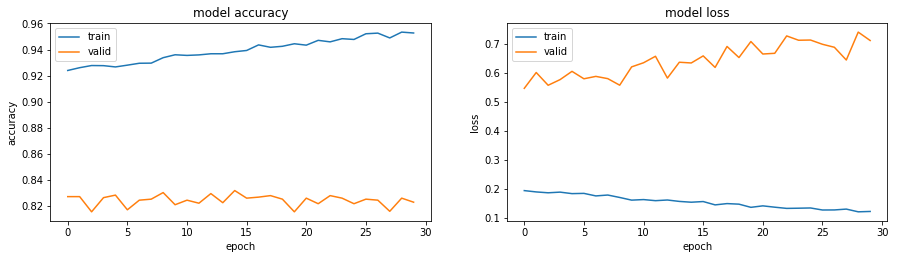

In [27]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [28]:
loss, acc = model.evaluate(X_test,y_test)
print('test accuracy: {}\n test loss: {}'.format(acc, loss))

3218/3218 [==============================] - 15s 5ms/step
test accuracy: 0.824735860634917
 test loss: 0.646681343512627
